<h1>Импорт библиотек

In [1]:
!pip install numpy matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [20]:
def sumPr(X, V):
    total_sum = np.zeros_like(V[0])  
    
    for i in range(len(X)):
        total_sum += X[i] @ V[i]
    
    return total_sum

In [21]:
def test1():
    X1 = np.array([[1, 2], [3, 4]])
    V1 = np.array([[1], [1]])
    X2 = np.array([[5, 6], [7, 8]])
    V2 = np.array([[1], [1]])
    
    X = [X1, X2]
    V = [V1, V2]
    result = sumPr(X, V)
    expected = np.array([[14], [22]])
    assert np.array_equal(result, expected), "Test 1 fail"
    print("Perfect")

In [22]:
test1()

Perfect


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [23]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

In [24]:
def test2():
    M1 = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9]])
    threshold1 = 0.5
    expected1 = np.array([[0, 0, 0], [0, 0, 1], [1, 1, 1]])
    result1 = binarize(M1, threshold1)
    assert np.array_equal(result1, expected1), "test fail"
    print("perfect")

In [25]:
test2()

perfect


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [27]:
def unique_rows(mat):
    unique_rows_list = []
    for row in mat:
        unique_rows_list.append(np.unique(row))
    return unique_rows_list

def unique_columns(mat):
    unique_columns_list = []
    for col in mat.T:
        unique_columns_list.append(np.unique(col))
    return unique_columns_list

In [41]:
def test3():
    mat1 = np.array([[1, 2, 2], 
                     [3, 4, 4], 
                     [1, 3, 3]])
    expected_unique_rows1 = [np.array([1, 2]), np.array([3, 4]), np.array([1, 3])]
    expected_unique_columns1 = [np.array([1, 3]), np.array([2, 3,4]),np.array([2,3,4])]

    result_rows1 = unique_rows(mat1)
    result_columns1 = unique_columns(mat1)
    assert all(np.array_equal(result_rows1[i], expected_unique_rows1[i]) for i in range(len(expected_unique_rows1))), "Test 1 for unique_rows failed"
    assert all(np.array_equal(result_columns1[i], expected_unique_columns1[i]) for i in range(len(expected_unique_columns1))), "Test 1 for unique_columns failed" 
    print("It's work")

In [42]:
test3()

It's work


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Сгенерированная матрица:
[[ 0.13443639 -2.2741458   0.18680939]
 [ 1.11287368 -0.46219777 -2.21980164]
 [-1.79279775  0.07514251 -0.7420777 ]
 [-0.24654817 -1.2398313  -2.04971649]
 [ 0.62184382  0.16580245 -0.1246789 ]]

Мат. ожидание для каждой строки:
[-0.65096667 -0.52304191 -0.81991098 -1.17869865  0.22098913]
Дисперсия для каждой строки:
[1.31781239 1.8529718  0.58456248 0.54377126 0.09440548]

Мат. ожидание для каждого столбца:
[-0.03403841 -0.74704598 -0.98989307]
Дисперсия для каждого столбца:
[0.98247349 0.83305918 0.96610749]


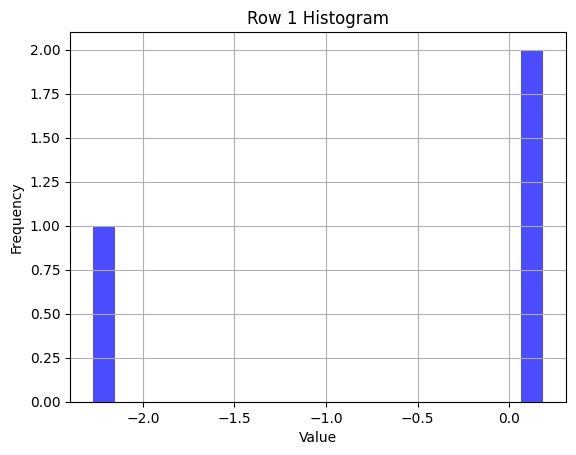

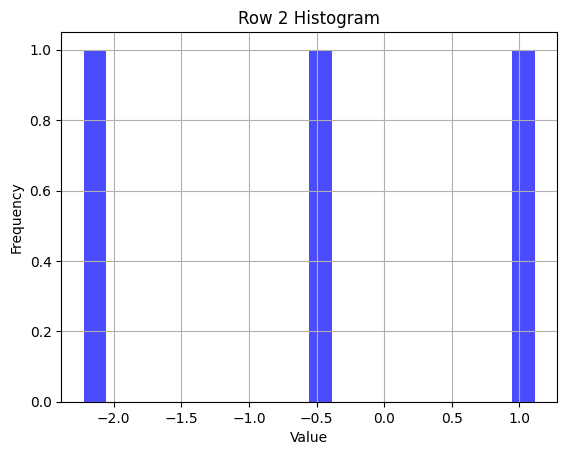

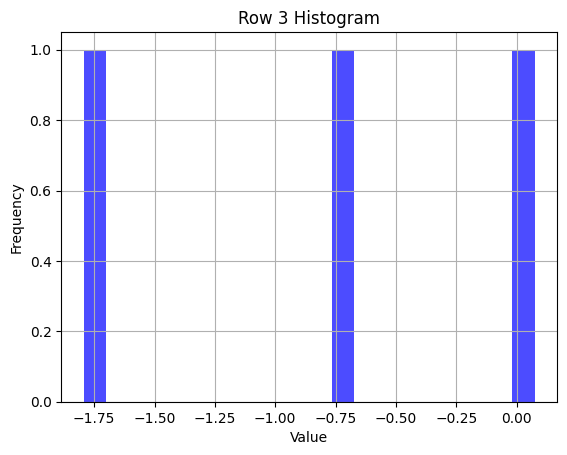

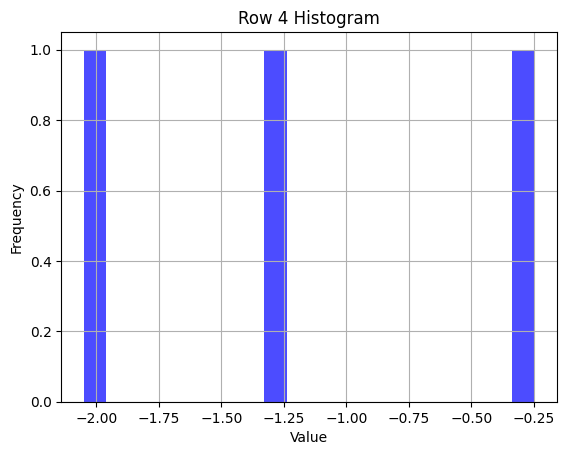

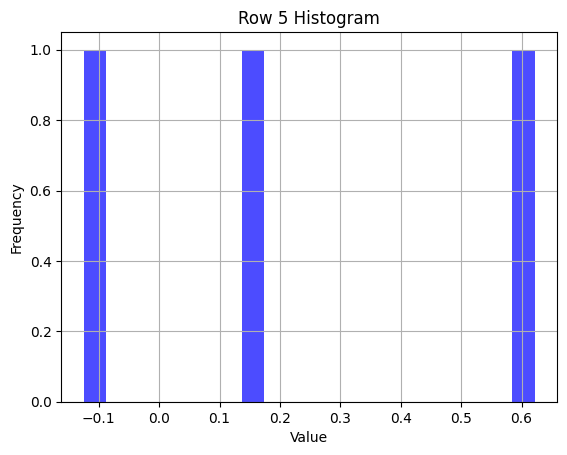

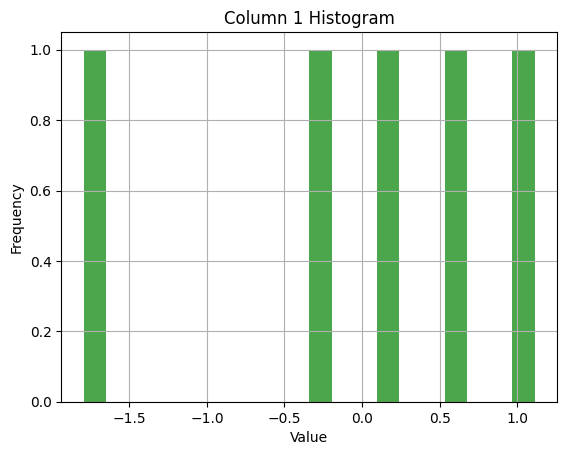

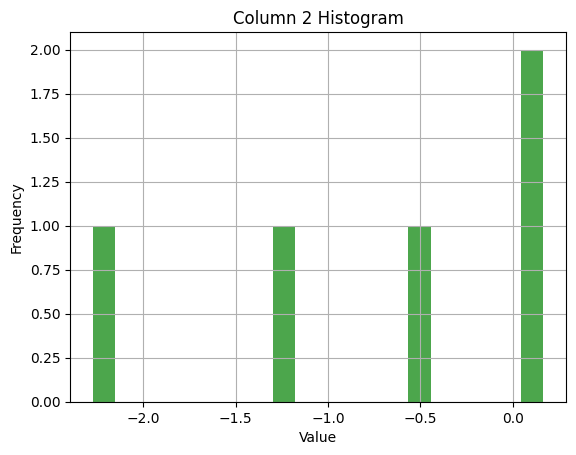

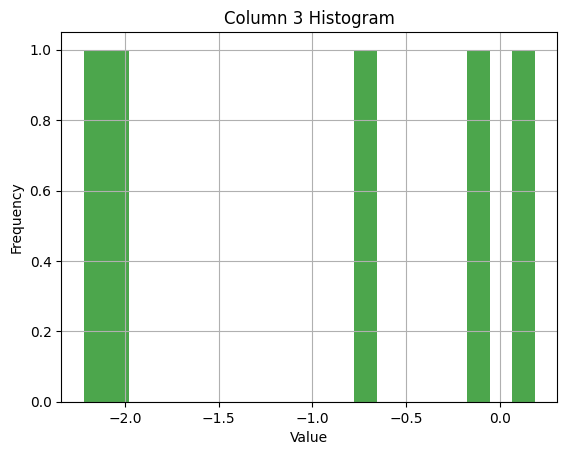

In [47]:
def generate_normal_matrix(m, n):
    return np.random.randn(m, n)

def calculate_mean_and_variance(matrix):
    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)
    column_means = np.mean(matrix, axis=0)
    column_variances = np.var(matrix, axis=0)
    return row_means, row_variances, column_means, column_variances

def plot_histograms(matrix):
    num_rows, num_columns = matrix.shape
    for i in range(num_rows):
        plt.figure()
        plt.hist(matrix[i], bins=20, color='blue', alpha=0.7)
        plt.title(f'Row {i+1} Histogram')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    for j in range(num_columns):
        plt.figure()
        plt.hist(matrix[:,j], bins=20, color='green', alpha=0.7)
        plt.title(f'Column {j+1} Histogram')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

matrix = generate_normal_matrix(5, 3)
print("Сгенерированная матрица:")
print(matrix)

row_means, row_variances, column_means, column_variances = calculate_mean_and_variance(matrix)
print("\nМат. ожидание для каждой строки:")
print(row_means)
print("Дисперсия для каждой строки:")
print(row_variances)
print("\nМат. ожидание для каждого столбца:")
print(column_means)
print("Дисперсия для каждого столбца:")
print(column_variances)

plot_histograms(matrix)

In [48]:
generate_normal_matrix(3, 4)

array([[ 1.16674194, -0.41369632, -1.16877401,  0.93768988],
       [ 0.20999709,  0.10972119,  1.01368546,  1.04196641],
       [-0.99212675, -0.36143966, -0.16915821,  0.22996802]])

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [49]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    return matrix

# Тест
m = 4
n = 5
a = 1
b = 0
result_matrix = chess(m, n, a, b)
print("Заполненная матрица в шахматном порядке:")
print(result_matrix)

Заполненная матрица в шахматном порядке:
[[1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]]


In [50]:
test5():
     m = 4
    n = 5
    a = 1
    b = 0
    result1 = chess(m, n, a, b)
    assert np.array_equal(result1, expected1), "test fail"
    print("perfect")

NameError: name 'test5' is not defined

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [11]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    # Your code goes here
    pass

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    # Your code goes here
    pass

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [12]:
# Your code goes here

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [13]:
# Your code goes here